<h2 align="center"> <b>NLP- Attention Models</b> </h2>

The sequential nature of models (RNNs, LSTMs, GRUs) does not allow for parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. In other words, if you rely on sequences and you need to know the beginning of a text before being able to compute something about the ending of it, then you can not use parallel computing. You would have to wait until the initial computations are complete. This is not good, because if your text is too long, then : 
- 1) it will take a long time for you to process it and 
- 2) you will lose a good amount of information mentioned earlier in the text as you approach the end.  

Therefore, attention mechanisms have become critical  for sequence modeling in various tasks, allowing modeling of dependencies without caring too much about their distance in the input or output sequences.

<h4 align="center"> <b>Neural Machine Translation</h4>


**Seq2Seq model :**<br>
- Introduced by Google in 2014
- Input and Output Sequences need not be of same length 
- To counter the vanishing gradient issue LSTM or GRU can be used.
- maps variable length sequences to fixed length memory.Here a sequence of variable dimensions can be encoded into a vector of fixed dimensions. Thus longer sequences are problematic for a traditional seq2seq model and cause information Bottleneck.<br>

Use case: English -> French Translation <br>
In Neural Machine Translation Model(Seq2Seq model) an Encoding and a Decoding layer is used. Both the layers can make use of LSTM. <br>
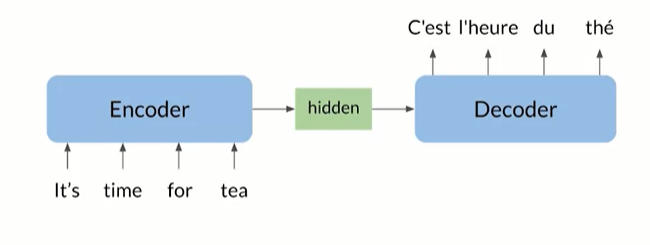


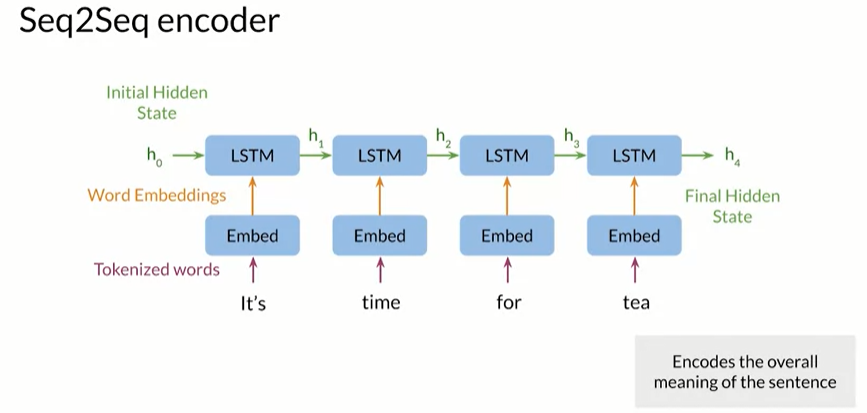

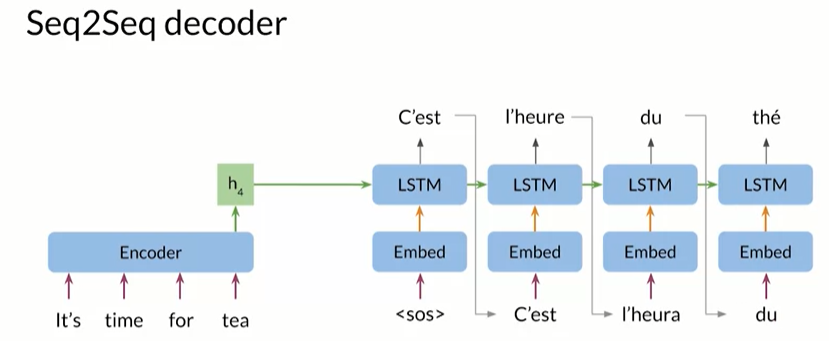

In the encoder the h4 contains the overall meaning of the sentence and contains the whole encoding of the sentence. The final hidden state is now passed to the decoder's first LSTM layer as cell state input. <br>
\<SOS\> is the word token used to represent the starting of the first word of machine translation and the output of that LSTM layer is passed as the next word input to the next LSTM layer.

***Drawback of Seq2Seq model***<br>
As the dimension of the encoding layer is fixed here for input sequence of variable dimensions, so for the longer sequences only fixed amount of information get past to the decoder from the encoder and this is called ***Information Bottleneck***.<br>
One possible way to overcome this is is to use the encoder hidden state for each word instead of using h4 only. But in this way we may have flaws in memory with context as we are passing all the hidden states and giving it the same importance.<br>
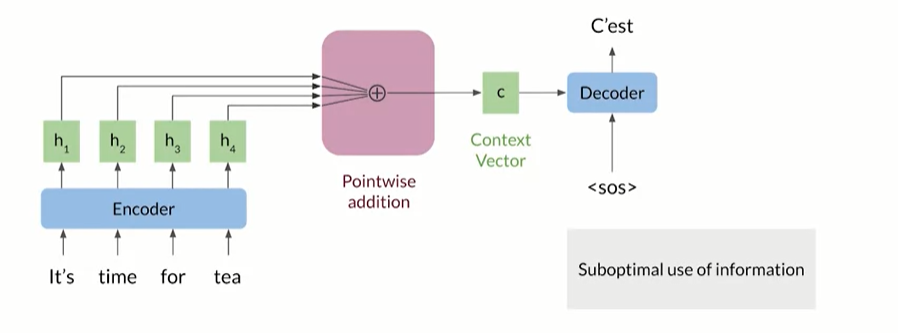

As a better approach what we do is that we asssign more weight to those words in the sequence which carries more importance.The decoder's previous hidden state denoted as $S_{i-1}$ helps to determine which input words are more important and be assigned more weights. C is the context vector which is the pointwise weighted sum of the encoded words at the encoder.
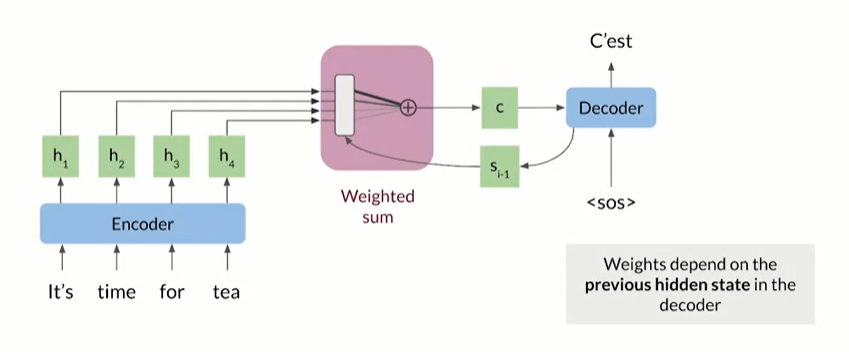

***Attention Layer in Depth***<br>
The goal of the attention layer is to return a context vector which contains relevance information about the encoder's states.<br>
The first step is to calculate the alignment $e_{i,j}$ which denotes how well the inputs around j matches the expected output at i.The more the match higher will be the value of $e_{i,j}$.This is done using a feedforward network taking the encoder and decoder hidden states as inputs.The weights for the feed forward network are learnt along the Seq2Seq model. These scores are turned to weights ranging from 0 to 1 using softmax activation function.<br>
Finally each encoder states are multiplied with its corresponding states and them summed together to form the context vector.<br>


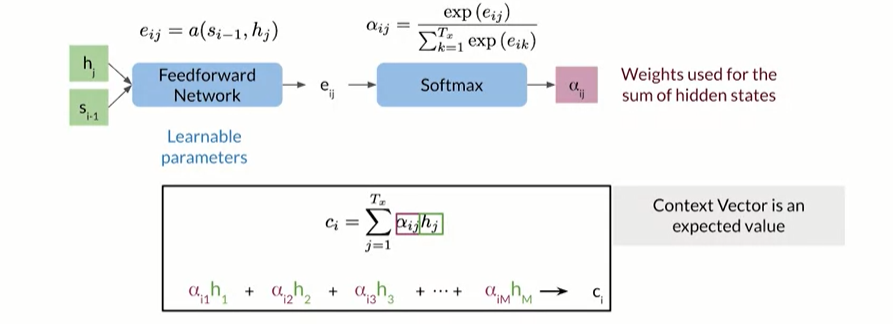

**Queries, Keys and Values**<br>
In Practice queries, keys and values are all represented by embedding vectors.Due to this we do not get exact matches but the model learns which words are similar to the source and target languages. The similarity between the source and target words is called ***Alignment***<br>
The query and key vectors helps us to create alignment scores which are measures how well the queries and keys match.These alignment scores are then turned into weights, used for the weighted sum of the value vectors.This weighted sum of value vector is returned as the attention vector.

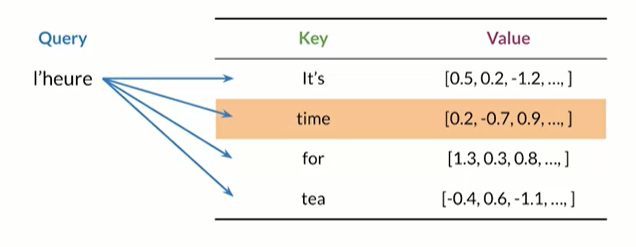

***Attention weights***<br>
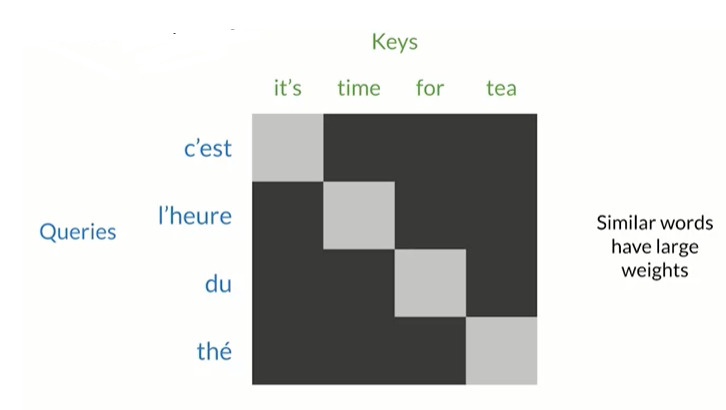

**Scaled Dot-Product Attention**<br>
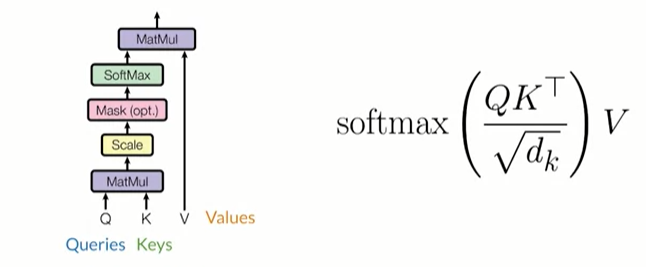

***Execution Steps***<br>
- The queries are packed together in the form of a vector so that for each query the attention can be calculated simultaneously.That's how we get the vector Q.

- The keys and values are also packed together in the form of a vector and taken as the input of the attention layer.That's how we get the vector K and V.
- First the vector Q and K are matrix multiplied so that we get a matrix of Alignment Scores. Alignment Score Matrix = $QK_{}^{T}$

- Now each of the values of the Alignment Score matrix are divided by the square root of the dimension of the Key vector (K). So the alignment scores are scaled and the values become $\frac{QK_{}^{T}}{\sqrt{d_{k}}}$. Scaling helps to improve the performance for larger attention models and can be treated as a Regularization Constant.

- Now using the softmax activation function the scaled attention scores are converted to the weigts of the attention models. $Weights= softmax(\frac{QK_{}^{T}}{\sqrt{d_{k}}})$. The weights for each query sum to 1.

- Finally the weights and the value matrix are matrix multiplied to get the weighted attention vectors for each of the queries. $Weighted \ Attention \  Vectors =  softmax(\frac{QK_{}^{T}}{\sqrt{d_{k}}})V$

***Steps for Machine Translation***<br>
- Use pre-trained vector embeddings
- Otherwise, initially represent words with one-hot-vectors.
- Keep track of index mapping for word2ind and ind2word dictionary
- add end of sequence tokens \<EOS>
- Pad the token with vector 0.


**Teacher Forcing**<br>
At the start of the Neural Machine Translation model a model is naive and in the early training stage if a certain error occurs, then that error propagates through the next stages as well.<br>
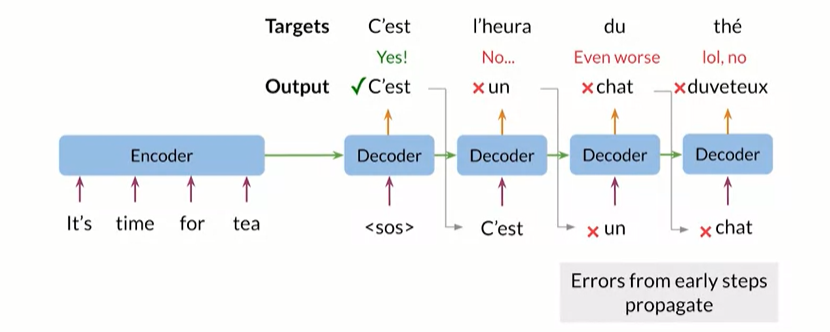

To overcome the issue we may use ground truth words as the decoder input as compared to the previous layer decoder input as the next layer decoder input in the early stages of the training. So even though the model makes a wrong prediction , it pretends it has predicted the correct label and it continues.It is called ***Teacher Forcing***<br>
At a later point of the training we may feed the docoder out put of the previous decoders as we had been doing earlier This is called ***Carriculumn Learning***<br>
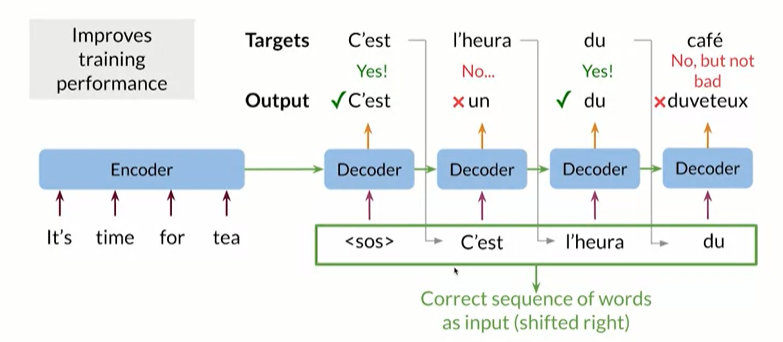

Link : https://towardsdatascience.com/what-is-teacher-forcing-3da6217fed1c

**BiLingual Evaluation Understudy (BLEU) Score**<br>
BLEU score compares machine translation to the reference(Human Level) translation.<br>
The closer the BLEU score value to 1, the better is the NMT model.It is Precission oriented evaluation Matrix.<br>
***Caveats :***<br>
1. Does not consider Semantic meaning of a sentence to give the score.
2. Does not consider Syntactical meaning of the sentence to give the score.


***Vanilla BLEU Score***<br>
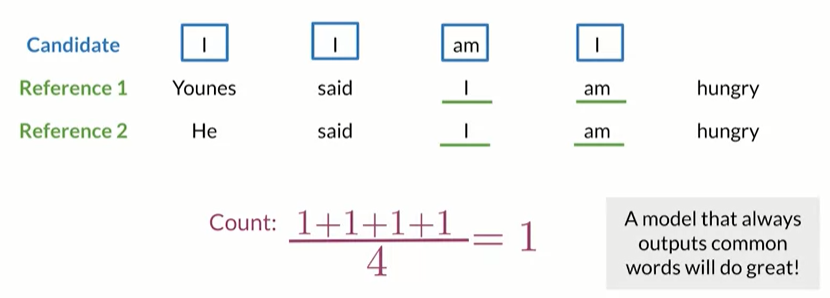

Here in the candidate sentence the first "I" occurs in both of the Reference sentences, Second "I" also, the word "am" also and the third "I" also occurs in both the reference sentences.<br>
BLEU score then becomes 1+1+1+1/4=1 (Here we see if a word occurs multiple times in a candidate sentence the  BLEU score will be better) but that is flawed. 

**Modified BLEU Score**<br>
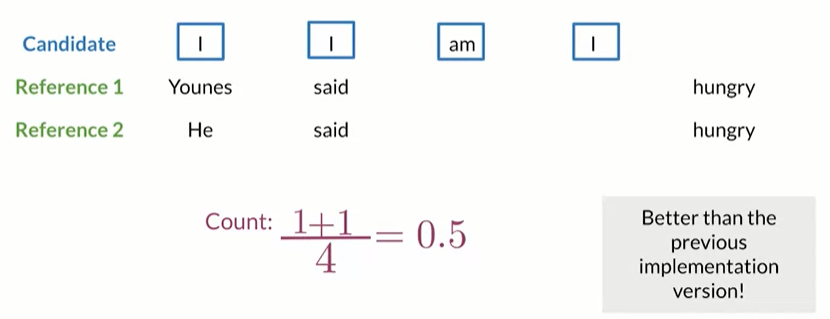

Here the first "I" appears in both the reference sentences so we write the count 1 and then remove this word from the reference sentences. So for the 2nd and 3rd "I" there is no match in the reference sentences so we write the count as 0. "AM" appears in both the references so after writting the count 1 we remove "am" from the reference sentences too.<br>
So, BLEU score becomes = 1+0+1+0/4=0.5 (Here we are able to reduce the effect of highly repeatative words to generate high BLEU score)

**ROUGE-N Score**<br>
ROUGE = Recall Oriented Understudy for Gisting Evaluation<br>
Unlike BLEU which is Precision oriented, ROUGE is Recall oriented. So it does not count how many of the candidate words appear in the reference sentences rather it counts how many of the words in the reference sentences appear in the candidate sentence.

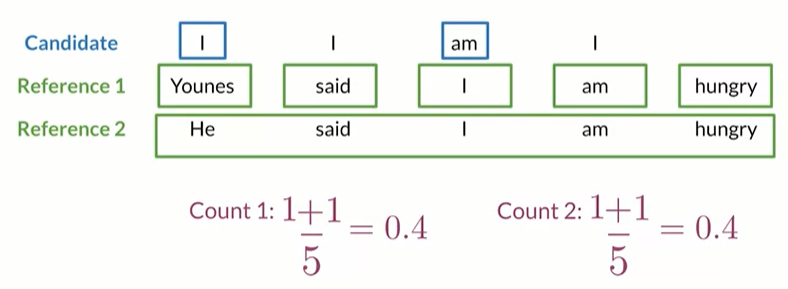

**F1-Score**<br>
As we know $F_{1} Score= \frac{2*Precision*Recall}{Precision+Recall} $<br>
Here as we saw , BLEU is precison based and ROUGE is Recall based so we can modify the F1 score for NLP as , <br>
$F_{1} Score= \frac{2*BLEU*ROUGE}{BLEU+ROUGE}$

**Greedy Decoding**<br>
Selects the most probable word at each step.<br>
But the best word at each step may not be the best for longer sequences.Can work fine for shorter sequences but limited by the inability to look further down the sequence.

**Random Sampling**<br>
Here the probabilities are associated to the each word and sampling is done accordingly for the next output.<br>here the problem is that it can be a bit too random for the task of machine translation.<br>
A probable solution could be to assign more weight to the words with higher probability.<br>
In Random sampling ***Temperature*** is a parameter that can be used to add more or less randomness.<br>
- For lower temperature setting , the network becomes more conservative and confident the probability to mis-translate decreases.
- For higher temperature setting, the network becomes becomes more random and excited , commits more mis-translation

**BEAM search**<br>
The most probable translation not necessarily comprised of the most probable words at each step.<br>
So if we have infinite computational power then the ideal scenario would be to to take each word from each step irrespective of their corresponding probability and build the whole sequence and then compare with the reference sentence but in practice with limited resource we use something called BEAM search.<br>
In Beam Search :<br>
1. Probability of multiple possible sequences at each step are calculated.
2. Beam width(B) determines the number of sequences to keep.
3. Untill all B, most probable sequences end with \<EOS>.

Note:
- Beam Search is computation expensive 
- Beam search with beam width B=1, is nothing but Greedy Decoding.
- It Penalizes long sequences so onje should normalize it by Sentence Length.

**BEAM search Example with B=2:**<br>
Corpus= "I am Hungry"<br>
1. STEP1:<br>
Like other methods, BEAM search also starts with a \<sos> token and calculates the probability of each word. As B=2 only the words with the highest probabilities are kept and rest are discarded.<br>
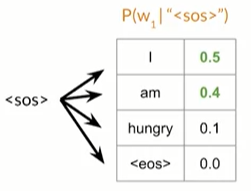



2.STEP2:<br>
In step 1 the words "I" and "am" had the highest prob. As we have B=2 so we will move forward with only those 2 words and discard the rest of the words. Now we will calculate conditional probability for the occuracnce of the next word for both the word "I" and "am" and will move forward with the sequences with maximum probability.Here for the 2nd word we will move forward with "I am " and "am I" sequences<br>
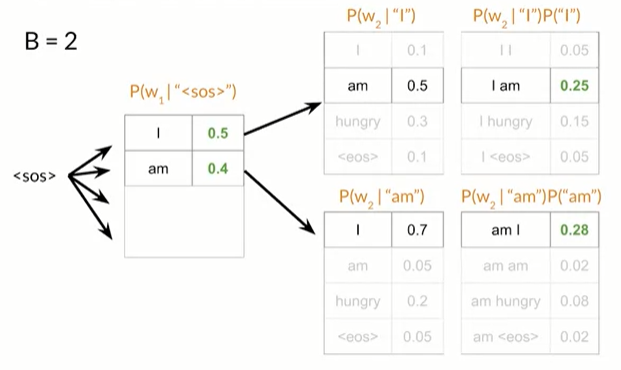

3. STEP3:<br>
As we did for the step2, for the step 3 we will do the same and as a conditional prob we will take "I am" and "am I" as the previous sequences. At the end will proceed with the 2 sequences with top most prob.<br>
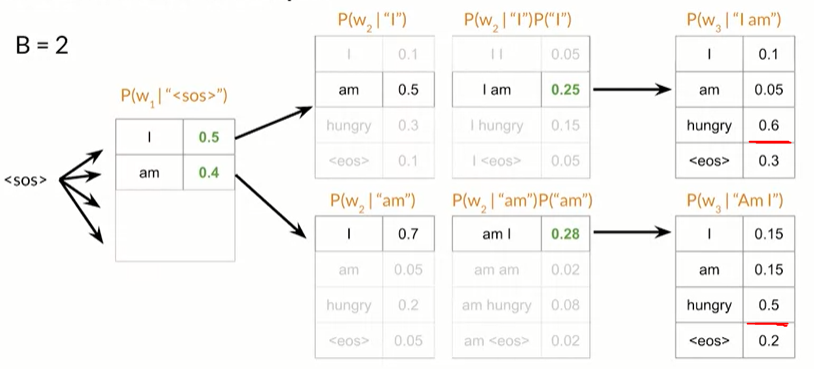

**Minimum Bayes Risk**<br>
Here is how it works:<br>
- Generate Several Candidate Translations
- Assign a similarity to every pair using similarity score (such as ROGUE)
- Select sample with highets average similarity.<br>
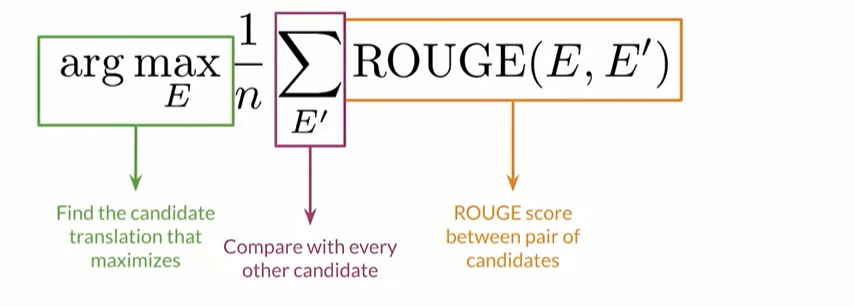

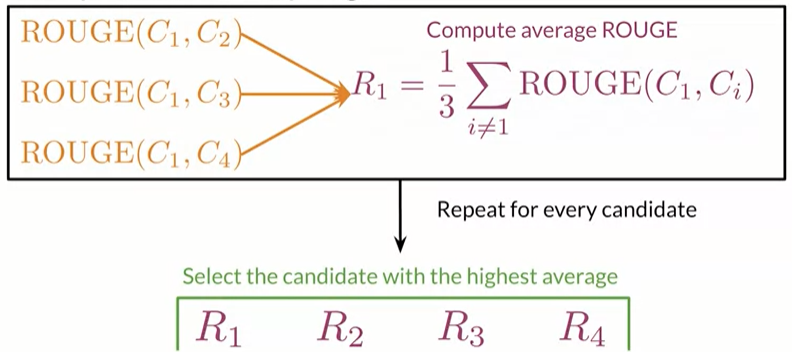

MBR performs better than Greedy Decoding and Random Sampling.

<h4 align="center"> <b>Text Summarization</h4>


**RNN vs Transformers**<br>
A typical RNN that is used to translate the English sentence "How are you?" to its German equivalent, "Wie sind Sie?". One of the biggest issues with these RNNs, is that they make use of sequential computation. That means, in order for your code to process the word "you", it has to first go through "are" and then "you". Two other issues with RNNs are the: <br>

1. Loss of information: For example, it is harder to keep track of whether the subject is singular or plural as you move further away from the subject.

2. Vanishing Gradient: when you back-propagate, the gradients can become really small and as a result,  your model will not be learning much. 

In contrast, transformers are based on attention and don't require any sequential computation per layer, only a single step is needed. Additionally, the gradient steps that need to be taken from the last output to the first input in a transformer is just one. For RNNs, the number of steps increases with longer sequences. Finally, transformers don't suffer from vanishing gradients problems that are related to the length of the sequences. In Transformers <u>Attention is all you need </u>(https://arxiv.org/abs/1706.03762?context=cs)

<h4 align="center"> <b>Transfer Learning</h4>


***Question Answering***<br>
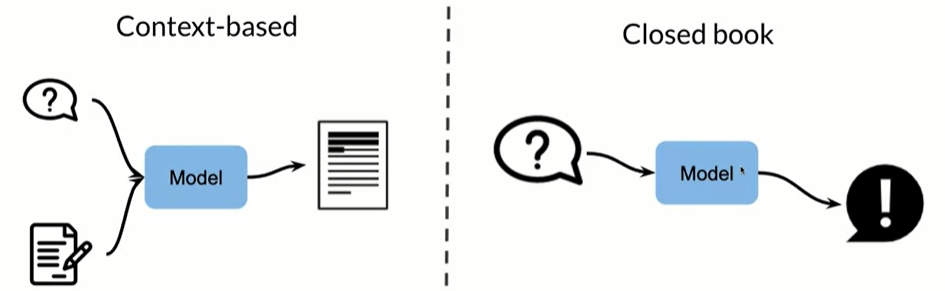

<u> Not just the data quality or the model can improve the performace but how the training is done can improve the performance as well</u><br>
Desirable Goals for using Transfer Learning <br>
1. We are using a already trained model weights and fitting it to our newer data to calculate predictions. It reduces the training time.
2. Improves the predictions.
3. We would need small dataset as the model already had learnt a lot from other tasks.

***Classical training***<br>
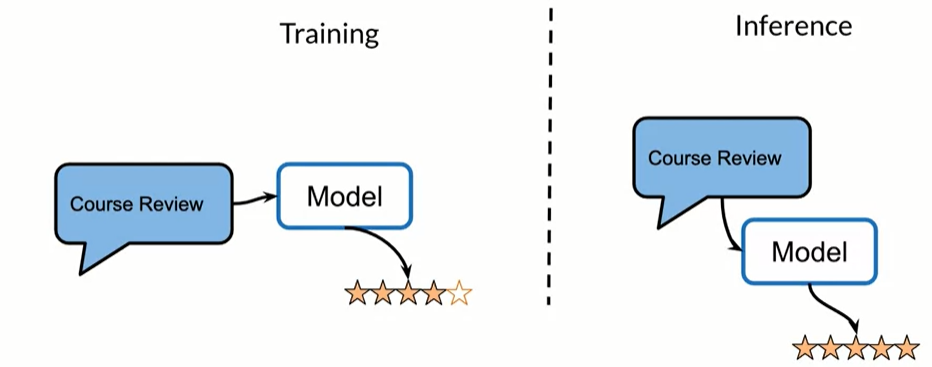

***Transfer Learning***<br>
Here, the weights are pretrained from a different model which we use to fit to a different set of data to predict the output from that data<br>
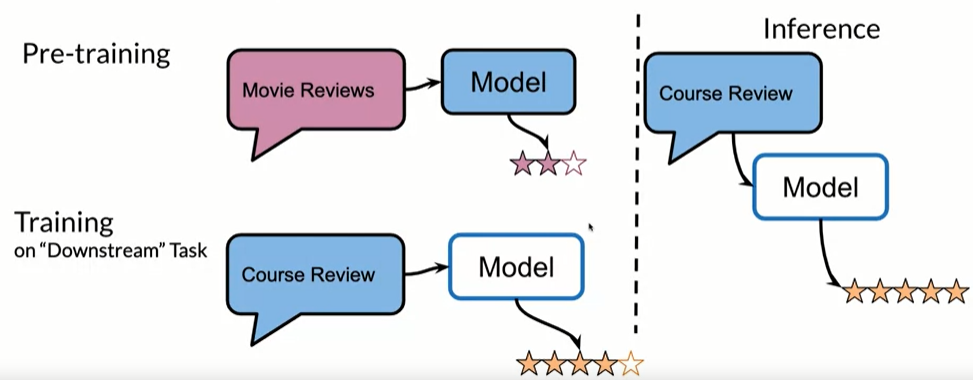

***T5 Model***<br>
One model used for different types of outputs<br>
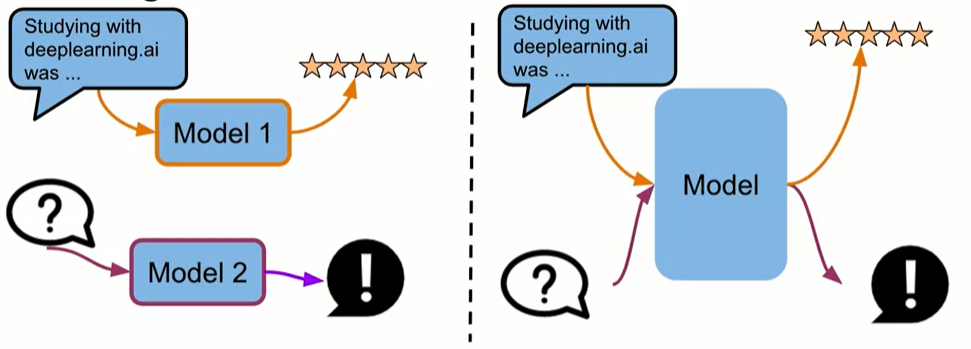

**REFERENCES**<br>
1. https://arxiv.org/abs/1910.10683
2. https://arxiv.org/abs/2001.04451
3. https://arxiv.org/abs/1706.03762
4. https://arxiv.org/pdf/1802.05365.pdf
5. http://jalammar.github.io/illustrated-transformer/
6. http://jalammar.github.io/illustrated-gpt2/
7. https://arxiv.org/abs/1810.04805
8. http://jalammar.github.io/how-gpt3-works-visualizations-animations/